In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
import os
import io
import boto3
 
 
#Values of the S3 server
bucketname = '2021-204'  
access_key = 'WZ5YD4I0QTUOXKR3LX0D'  
secret_access_key = 'ZMghEBZub8v/dOiU5sP/OjlT4wBYYEct52ame99x'  
endpoint = 'https://s3.ki.se/'  
region='eu-north-1'

In [4]:
resource = boto3.resource('s3', endpoint_url=endpoint, region_name=region, aws_access_key_id = access_key, 
                          aws_secret_access_key= secret_access_key)

client = boto3.client('s3', endpoint_url=endpoint, region_name=region, aws_access_key_id = access_key, 
                          aws_secret_access_key= secret_access_key)



In [ ]:
# Get resource 
bucket = resource.Bucket(bucketname)
for obj in bucket.objects.all():
    print('Object:', obj.key)


Streaming output truncated to the last 5000 lines.
Object: 2021-204-1-1/data/10187_20990909_L_CC_1.dcm
Object: 2021-204-1-1/data/10187_20990909_L_MLO_1.dcm
Object: 2021-204-1-1/data/10187_20990909_R_CC_1.dcm
Object: 2021-204-1-1/data/10187_20990909_R_MLO_1.dcm
Object: 2021-204-1-1/data/10190_20990909_L_CC_1.dcm
Object: 2021-204-1-1/data/10190_20990909_L_MLO_1.dcm
Object: 2021-204-1-1/data/10190_20990909_R_CC_1.dcm
Object: 2021-204-1-1/data/10190_20990909_R_MLO_1.dcm
Object: 2021-204-1-1/data/10191_20990909_L_CC_1.dcm
Object: 2021-204-1-1/data/10191_20990909_L_MLO_1.dcm
Object: 2021-204-1-1/data/10191_20990909_R_CC_1.dcm
Object: 2021-204-1-1/data/10191_20990909_R_MLO_1.dcm
Object: 2021-204-1-1/data/10192_20990909_L_CC_1.dcm
Object: 2021-204-1-1/data/10192_20990909_L_MLO_1.dcm
Object: 2021-204-1-1/data/10192_20990909_R_CC_1.dcm
Object: 2021-204-1-1/data/10192_20990909_R_MLO_1.dcm
Object: 2021-204-1-1/data/10193_20990909_L_CC_1.dcm
Object: 2021-204-1-1/data/10193_20990909_L_CC_2.dcm
Objec

In [ ]:
# Another method to connect to the low-level client interface
 
response = client.list_objects(
    Bucket='2021-204'
)
 
# print(response)
 
if 'Contents' in response:
    print('Printing the s3 bucket contents.\n')
    for content in response['Contents']:
        print(content['Key'])
else:
    print('s3 bucket is empty.')

Printing the s3 bucket contents.

2021-204-1-1/data/00002_20990909_L_CC_1.dcm
2021-204-1-1/data/00002_20990909_L_MLO_1.dcm
2021-204-1-1/data/00002_20990909_R_CC_1.dcm
2021-204-1-1/data/00002_20990909_R_MLO_1.dcm
2021-204-1-1/data/00004_20990909_L_CC_1.dcm
2021-204-1-1/data/00004_20990909_L_CC_2.dcm
2021-204-1-1/data/00004_20990909_L_MLO_1.dcm
2021-204-1-1/data/00004_20990909_L_MLO_2.dcm
2021-204-1-1/data/00004_20990909_R_CC_1.dcm
2021-204-1-1/data/00004_20990909_R_CC_2.dcm
2021-204-1-1/data/00004_20990909_R_MLO_1.dcm
2021-204-1-1/data/00004_20990909_R_MLO_2.dcm
2021-204-1-1/data/00005_20990909_L_CC_1.dcm
2021-204-1-1/data/00005_20990909_L_CC_2.dcm
2021-204-1-1/data/00005_20990909_L_CC_3.dcm
2021-204-1-1/data/00005_20990909_L_CC_4.dcm
2021-204-1-1/data/00005_20990909_L_MLO_1.dcm
2021-204-1-1/data/00005_20990909_L_MLO_2.dcm
2021-204-1-1/data/00005_20990909_L_MLO_3.dcm
2021-204-1-1/data/00005_20990909_L_MLO_4.dcm
2021-204-1-1/data/00005_20990909_R_CC_1.dcm
2021-204-1-1/data/00005_20990909

In [ ]:
# An example for downloading a single image
client.download_file(bucketname, obj.key, 'drive/MyDrive/image1.dcm')
print('success')

success


In [ ]:
#'2021-204-1-1/data/00002_20990909_L_CC_1.dcm'
client.download_file(bucketname, '2021-204-1-1/data/00002_20990909_L_CC_1.dcm', 'drive/MyDrive/image1.dcm')
print('success')

success


In [ ]:
! pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.1 MB/s 


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.1.111.111111.1111111111.1111.1111111111.111.1
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.1.111.1.1111111.1.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0020) Study Date                          DA: '20990909'
(0008, 0060) Modality                            CS: 'MG'
(0008, 0070) Manufacturer                        LO: 'HOLOGIC, Inc.'
(0008, 0080) Institution Name                    LO: 'Karolinska Solna'
(0008, 1010) Station Name                        SH: 'Mammografi Lab 99

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/pydicom/valuerep.py:290: UserWarning: The value length (18) exceeds the maximum length of 16 allowed for VR SH.
  warnings.warn(msg)


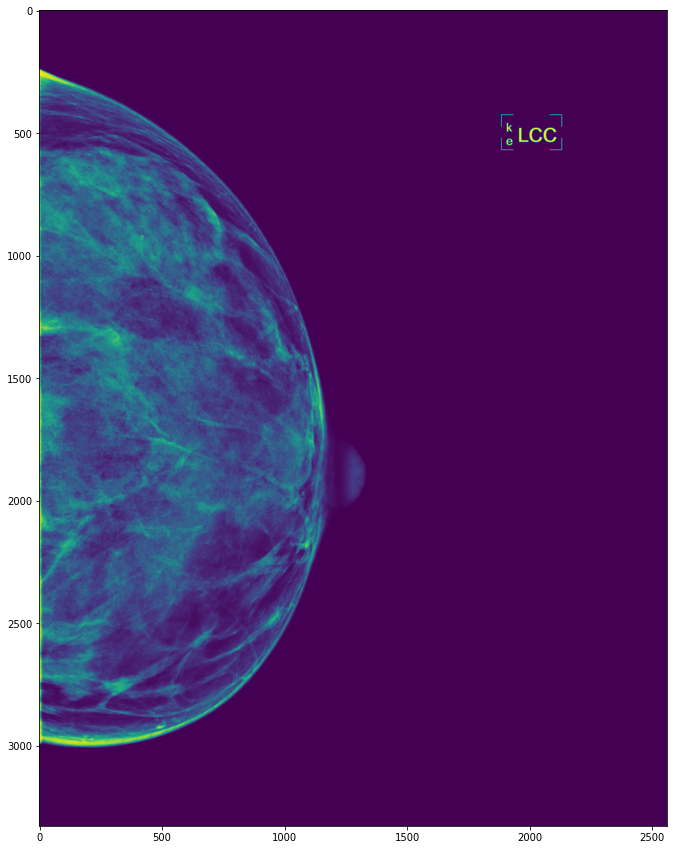

In [ ]:
from pydicom import dcmread
import matplotlib.pylab as plt

image_file='/content/drive/MyDrive/image1.dcm'
ds = dcmread(image_file)
print(ds)
plt.figure(figsize=(15,15))
plt.imshow(ds.pixel_array)

In [ ]:
ds.pixel_array.shape

(3328, 2560)

In [ ]:
ds.pixel_array

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [681, 607, 477, ...,   0,   0,   0],
       [547, 538, 448, ...,   0,   0,   0],
       [665, 611, 498, ...,   0,   0,   0]], dtype=uint16)

### Download of image dataset

In [5]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Data_PS3/Data_tabular/dataset_image.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10000 non-null  int64  
 1   anon_filename  10000 non-null  object 
 2   rad_decision   10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [6]:
data_img_name=list(data['anon_filename'])

file_path='2021-204-1-1/data/'

dest_path='drive/MyDrive/Data_PS3/Data/'

In [7]:
data_img_name[2], len(data_img_name)

('05215_20990909_R_MLO_3.dcm', 10000)

In [8]:
for name in data_img_name:
  file_name= file_path + name
  dest_name= dest_path + name
  client.download_file(bucketname, file_name, dest_name)


### Test for data 

In [ ]:
import pydicom
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Read the DICOM data and extract the pixel data
def read_dicom_image(image_path):
  # Read the DICOM data
  dcm_data = pydicom.dcmread(image_path)
  # Extract the pixel data
  image = dcm_data.pixel_array
  return image

# Decode the pixel data and create a dataset
def decode_dicom_image(image_bytes):
  # Decode the image bytes and return the image
  image = tf.image.decode_image(image_bytes)
  return image

def create_dataset(images_dir):
  # Create a dataset from the DICOM images in the specified directory
  dataset = tf.data.Dataset.list_files(images_dir + '/*.dcm')
  dataset = dataset.map(lambda x: tf.io.read_file(x))
  dataset = dataset.map(decode_dicom_image)
  return dataset


In [ ]:
X=create_dataset(img_path)

In [ ]:
X

<MapDataset element_spec=TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None)>

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
dataset = datagen.flow(X, batch_size=64)

TypeError: ignored

In [ ]:
X1=[]

for img in img_name[:500]:
  image_file= img_path + img
  ds = dcmread(image_file)
  X1.append(ds.pixel_array)

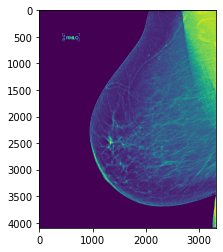

In [ ]:
plt.imshow(X1[-1])

In [ ]:
with open('test_X1.npy', 'wb') as f:
    np.save(f, np.array(X1))

<ipython-input-10-fdc7fd057664>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(X1))


In [ ]:
X2=[]

for img in img_name[500:1000]:
  image_file= img_path + img
  ds = dcmread(image_file)
  X2.append(ds.pixel_array)

In [ ]:
del X2

In [ ]:
with open('test_X2.npy', 'wb') as f:
    np.save(f, np.array(X2))

<ipython-input-7-04f815f23370>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(X2))


In [ ]:
X3=[]

for img in img_name[1000:1500]:
  image_file= img_path + img
  ds = dcmread(image_file)
  X3.append(ds.pixel_array)

In [ ]:
with open('test_X3.npy', 'wb') as f:
    np.save(f, np.array(X3))

<ipython-input-10-85dabab2845a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(X3))


In [ ]:
del X3

In [ ]:
X4=[]

for img in img_name[1500:2000]:
  image_file= img_path + img
  ds = dcmread(image_file)
  X4.append(ds.pixel_array)


In [ ]:
with open('test_X4.npy', 'wb') as f:
    np.save(f, np.array(X4))

<ipython-input-13-8eab6686c862>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f, np.array(X4))


In [ ]:
del X4

In [ ]:
X1 = np.load('/content/test_X1.npy', allow_pickle=True)

In [ ]:
X2= np.load('/content/test_X2.npy', allow_pickle=True)

In [ ]:
X3= np.load('/content/test_X3.npy', allow_pickle=True)